# Brain Tumor Classification and Segmentation
Kelompok 17: 
1. Kent Amadeo Timotheus - 2702227025
2. Theodore Zachary - 2702244100
3. Albertus Edbert Chandrajaya - 2702345440

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import os
import cv2
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split

# Dataset Preparation
## Dataset Gathering

In [ ]:
DATA_PATH = '/data'
TARGET_SIZE = (256, 256)

images = []
masks = []
labels = []

def z_score_normalize(image):
    mean = np.mean(image)
    std = np.std(image)
    return (image - mean) / std

for folder in os.listdir(DATA_PATH):
    label = folder
    folder_path = os.path.join(DATA_PATH, folder)
    
    for image_file in os.listdir(folder_path):
        image_path = os.path.join(folder_path, image_file)
        image = cv2.imread(image_path)
        image = cv2.resize(image, TARGET_SIZE)
        gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
        
        img_zscore = z_score_normalize(gray)
        
        if image_file.endswith('_mask.png'):
            masks.append((image > 127).astype(np.uint8))
        else:
            image_norm = cv2.normalize(img_zscore, None, alpha=0, beta=1, norm_type=cv2.NORM_MINMAX) # Z-Score Normalization with Min-Max Scaling
            images.append(image_norm)
            labels.append(label)
        
X = np.array(images)
M = np.array(masks)

encoder = OneHotEncoder(sparse=False)
y = encoder.fit_transform(np.array(labels).reshape(-1, 1))

print(f'Images shape: {X.shape}')
print(f'Masks shape: {M.shape}')
print(f'Labels shape: {y.shape}')

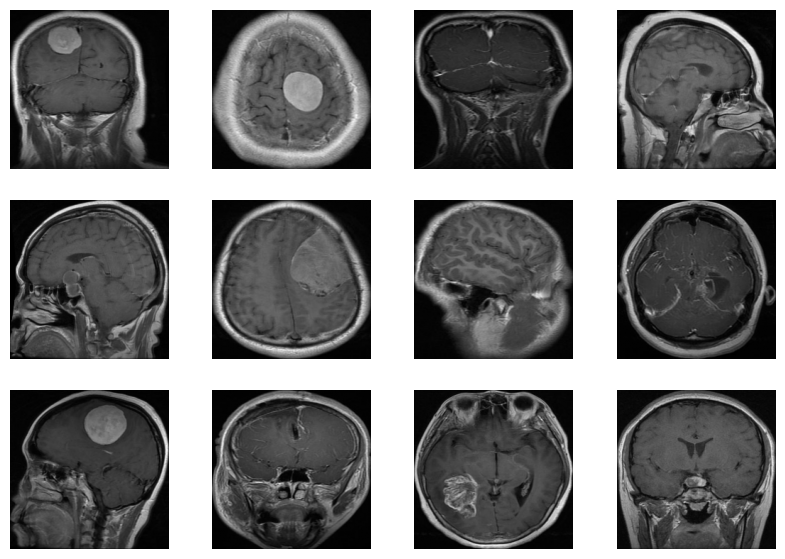

In [ ]:
plt.figure(figsize=(10, 7))
for i in range(12):
    plt.subplot(3, 4, i+1) # i+1 because the index for matplotlib starts from 1, while i starts from 0
    plt.imshow(X[i], cmap="gray")
    # plt.title(y[i])
    plt.axis('off')
plt.show()

## Image Preprocessing

Split the data into training data and testing data. In this case we will have 33% of the data be testing data, while the remaining 67% will be used to train the model.

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=22) # split the data

print("Number of images in x_train: ", len(X_train))
print("Image shape in X_train: ", X_train[0].shape)
print()

print("Number of images in x_test: ", len(X_test))
print("Image shape in X_test: ", X_test[0].shape)

Number of images in x_train:  4705
Image shape in X_train:  (224, 224, 3)

Number of images in x_test:  2318
Image shape in X_test:  (224, 224, 3)


In [ ]:
print("X_train Shape: ", X_train.shape)
print("X_test Shape: ", X_test.shape)
print("y_train Shape: ", y_train.shape)
print("y_test Shape: ", y_test.shape)

X_train Shape:  (4705, 224, 224, 3)
X_test Shape:  (2318, 224, 224, 3)
y_train Shape:  (4705, 2)
y_test Shape:  (2318, 2)


# Training
## Training Preparation

## Training Process

## Saving the Model

# Training Results

# Prediction